Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

In [2]:
!pip install opendatasets

In [59]:
import opendatasets as od
import pandas as pd
import time
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [33]:
df = pd.read_csv('/content/Corona_NLP_test.csv')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [83]:
def label_sentiment(tweet):
    if not tweet.strip():  # Проверка на пустую строку
        return 'Пустой твит'
    elif any(word in tweet for word in ['empty', 'panic', 'death', 'crisis', 'quarantine', 'isolation', 'loss']):
        return 'Очень отрицательно'
    elif any(word in tweet for word in ['hand sanitizer', 'safety', 'support', 'progress', 'awareness', 'protection']):
        return 'Положительно'
    elif any(word in tweet for word in ['protect', 'vaccine', 'recovery', 'unity', 'hope', 'innovation']):
        return 'Очень положительно'
    elif any(word in tweet for word in ['toiletpaper', 'virus', 'health', 'spread', 'data', 'advisory']):
        return 'Нейтрально'
    else:
        return 'Отрицательно'

# Загрузка данных
df = pd.read_csv('/content/Corona_NLP_test.csv')

# Удаление пустых строк из столбца
df = df[df['OriginalTweet'].str.strip() != '']

# Применение функции к DataFrame
df['AutoLabel'] = df['OriginalTweet'].apply(label_sentiment)

# Сохранение данных в файл
df.to_csv('/content/Corona_NLP_test_labeled.csv', index=False)

In [84]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,AutoLabel
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,Очень отрицательно
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,Положительно
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Очень положительно
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,Нейтрально
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,Нейтрально


<Axes: >

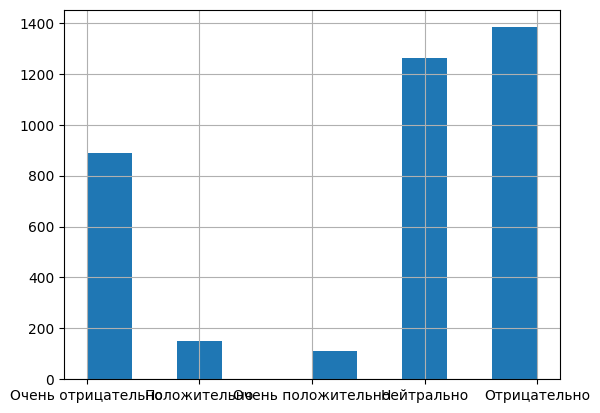

In [85]:
df["AutoLabel"].hist()

In [86]:
df = pd.read_csv('/content/Corona_NLP_test.csv',engine = 'python',encoding = 'utf-8', on_bad_lines='skip')


In [87]:
subset = df.sample(frac = 0.01)

In [88]:
subset.to_csv('part_hw.csv',index = False)

In [89]:
# Загрузка данных
manual_data = pd.read_csv("/content/project-3-at-2024-10-01-19-18-a113f17f.csv")
rule_based_data = pd.read_csv("/content/Corona_NLP_test.csv")

# Объединение данных
combined_data = pd.concat([manual_data, rule_based_data], ignore_index=True)

# Сохранение объединенного набора данных
combined_data.to_csv("combined_data.csv", index=False)

print("Данные успешно объединены и сохранены в combined_data.csv")

Данные успешно объединены и сохранены в combined_data.csv


In [90]:
# Подготовка данных для обучения
X = df['OriginalTweet']  # Тексты твитов
y = df['AutoLabel']  # Метки классов

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текста с использованием CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)  # Обучение и преобразование
X_test_vectorized = vectorizer.transform(X_test)  # Преобразование тестового набора

# Обучение модели наивного байесовского классификатора
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Оценка модели
y_pred = model.predict(X_test_vectorized)  # Предсказание классов для тестового набора
print(classification_report(y_test, y_pred))  # Отчет по классификации
print("Accuracy:", accuracy_score(y_test, y_pred))  # Точность модели

                    precision    recall  f1-score   support

        Нейтрально       0.00      0.00      0.00         8
      Отрицательно       0.81      0.99      0.89       580
Очень отрицательно       0.87      0.29      0.43       155
Очень положительно       1.00      0.11      0.20         9
      Положительно       0.00      0.00      0.00         8

          accuracy                           0.82       760
         macro avg       0.54      0.28      0.31       760
      weighted avg       0.81      0.82      0.77       760

Accuracy: 0.8171052631578948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Оценка модели
y_pred = model.predict(X_test_vectorized)  # Предсказание классов для тестового набора
print(classification_report(y_test, y_pred))  # Отчет по классификации
print("Accuracy:", accuracy_score(y_test, y_pred))  # Точность модели

                    precision    recall  f1-score   support

        Нейтрально       0.00      0.00      0.00         8
      Отрицательно       0.81      0.99      0.89       580
Очень отрицательно       0.87      0.29      0.43       155
Очень положительно       1.00      0.11      0.20         9
      Положительно       0.00      0.00      0.00         8

          accuracy                           0.82       760
         macro avg       0.54      0.28      0.31       760
      weighted avg       0.81      0.82      0.77       760

Accuracy: 0.8171052631578948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Вывод:**  

### Результаты показывают, что модель имеет высокую точность для класса "Отрицательно" (0.81) и "Очень отрицательно" (0.87), но значительно хуже справляется с классами "Нейтрально" и "Положительно", где точность равна 0.00. Это указывает на то, что модель не предсказывает эти классы, что подтверждается предупреждениями о неопределенной метрике.